# Gaussian Mixture Model

## Overview

K-means produces clusters whereby each sample belongs to one cluster only and the produced clusters are more or less of equal spatial length.
However, in practice this may not be justified. In this section we will discuss a clustering methodology where each sample belongs to all clusters with a given probability.
Namely, we will discuss the <a href="https://scikit-learn.org/stable/modules/mixture.html">Gaussian mixture model</a> or GMM clustering. In this approach a cluster
is represented by using three elements; mean, variance and a weight and each sample belongs to all clusters with a given probability.

## Gaussian mixture model

Let's consider a dataset $\mathbf{D}$. As always, a generating process $p_{\mathbf{D}}$ is implied about the data. We assume that the whole
distribution is generated by the sum of $k$ Gaussian distributions. Therefore, the probability of observing each sample 
given the cluster $k$ can be expressed according to


\begin{equation}
p(\mathbf{d}_i | C=k) = \sum_{j=1}^{k}w_j N\left(\mathbf{d}_i|\mu_j, \Sigma_j\right)
\end{equation}

where $w_j$ is the weight associated with the $jth$ Gaussina distribution. In order for the expression above to represent a true probability,
we need to have 

\begin{equation}
\sum_j w_j = 1
\end{equation}

Clustering of a point can then be done accoridng to

\begin{equation}
C = argmax_{\mathbf{d}} p(\mathbf{d}_i | C=k)
\end{equation}

The question now arises how do we estimate the weights $w_j$? The classical and natural method for computing the
maximum-likelihood estimates (MLEs) for mixture distributions is the <a href="https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm">Expectation-Maximazation</a> algorithm. We will not go into details here as the calculations can become rather lengthy. Instead we summarize below the workings of the algorithm.


----
**Alogorithm: Gaussian Mixture Model**

1. Input
    - Set number of iterations $N$
    - Set the number of clusters $k$
    - Set the tolerance $T$ denoting the convergence
2. Execute
    - Initialize the centroids $\mu_j, \Sigma_j, w_j$
3. Iterate
    - E-step compute $p(j|\mathbf{d}_i)$
    - M-step update $\mu_j, \Sigma_j, w_j$

----

The algorithm above requires some sort of initialization. Although theoretically any approach 
can do the trick, this can have an impact, since mixture likelihoods are generally multimodal. 

Let's see some examples. The examples below, use the same data as the respective examples in the K-means section. This way
we can have a visual comparison on the performance of the algorithms. For both examples, we will utilize the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html">GaussianMixture</a> form the sklearn package. Check the documentation of the
class for further details.

## Example 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
np.random.seed(42)

x1 = np.random.normal(1.0, 0.1, 50)
y1 = np.random.normal(1.0, 0.1, 50)

x2 = np.random.normal(3.0, 0.6, 50)
y2 = np.random.normal(3.0, 0.6, 50)

x3 = np.random.normal(5.0, 0.8, 50)
y3 = np.random.normal(5.0, 0.8, 50)

In [3]:
# mix the data
x = []
y = []
z = []

for i in range(50):
    x.append([x1[i], y1[i]])
    y.append([x2[i], y2[i]])
    z.append([x3[i], y3[i]])

X = np.vstack([x, y,z])

In [9]:
gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
pred = gmm.fit_predict(X)

if gmm.converged_:
    print("GMM model converged")

GMM model converged


Let's get the predicted clusters

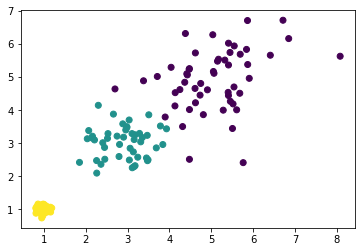

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

## Example 2

In [11]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [12]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)



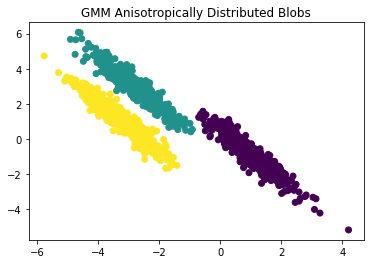

In [14]:
common_params = {
    "n_init": 4,
    "random_state": random_state,
}
y_pred = GaussianMixture(n_components=3, **common_params).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("GMM Anisotropically Distributed Blobs")
plt.show()

The results computed via GMM are similar to the results computed via K-means. K-means can be considered as a particular cas of a spherical GMM with covariance matrix
$\Sigma \rightarrow 0$.

## Summary

In this section, we had a look at the Gaussian mixture model for clustering. Compared to K-means, this approach only probabilistically assigns
a data poin to a cluster. This makes it a suitable candidate when it is difficult to differentiate where the data point should belong to.
The GMM approach is utilizing the Expectation-Maximization algorithm in order to compute the weights that is attributed to probability mass.
Similarly to the approach used in K-means, the algorithm requires initialization and although this can be chosen arbitrarily, it may have have an impact
on the performance of the algorithm. GMM  can also be thought of as a prototype method, similar in spirit to K-means;
each cluster is described in terms of a Gaussian density, which has a centroid, just like in K-means, and a covariance matrix. 

We also introduced ```GaussianMixture``` class from the sklearn package. Check on the documentation of the class for more information.


## References